In [2]:
import time

In [3]:
import os

In [4]:
import progressbar

In [5]:
import matplotlib.pyplot as plt

In [6]:
import tensorflow as tf

Using TensorFlow backend.


In [7]:
from keras.backend.tensorflow_backend import set_session

In [8]:
import keras

In [9]:
import sys, time, os, warnings

In [10]:
import numpy as np

In [11]:
import pandas as pd

In [12]:
from collections import Counter

In [13]:
from keras.preprocessing.image import load_img

In [14]:
from nltk.tokenize import word_tokenize

In [15]:
import progressbar

In [16]:
warnings.filterwarnings("ignore")

In [17]:
#using tensorflow backend

In [18]:
dir_Flickr_jpg ="C:/Users/hp/OneDrive/Desktop/tic2/Desktop/Imgcap/archive/input/flickr8k-sau/Flickr_Data/Images"
dir_Flickr_text ="C:/Users/hp/OneDrive/Desktop/tic2/Desktop/Imgcap/archive/input/flickr8k-sau/Flickr_Data/Flickr_TextData/Flickr8k.token.txt"

jpgs=os.listdir(dir_Flickr_jpg)
print("The number of jpg files in Flicker30k: {} ".format(len(jpgs)))




The number of jpg files in Flicker30k: 8091 


In [19]:
##loading as dataframe
def load_csv(directory):
    desc=dict()
    text = pd.read_csv(directory, delimiter = '|', header = None, names=["filename","index","caption"])
    text = text.iloc[1:,:]
    df_new = text[text.iloc[:,2].notnull()]
    print(df_new.iloc[:5,:])
    return df_new


In [20]:
file = open(dir_Flickr_text, 'r')
text = file.read()
file.close()

datatxt = []
for line in text.split('\n'):
    col = line.split('\t')
    if len(col) == 1:
        continue
    w = col[0].split("#")
    datatxt.append(w + [col[1].lower()])

df_txt = pd.DataFrame(datatxt, columns = ["filename","index","caption"])

uni_filenames = np.unique(df_txt.filename.values)
print("The number of unique file names : {}".format(len(uni_filenames)))
print("The distribution of the number of captions for each image: ")
Counter(Counter(df_txt.filename.values).values())
    
    

The number of unique file names : 8092
The distribution of the number of captions for each image: 


Counter({5: 8092})

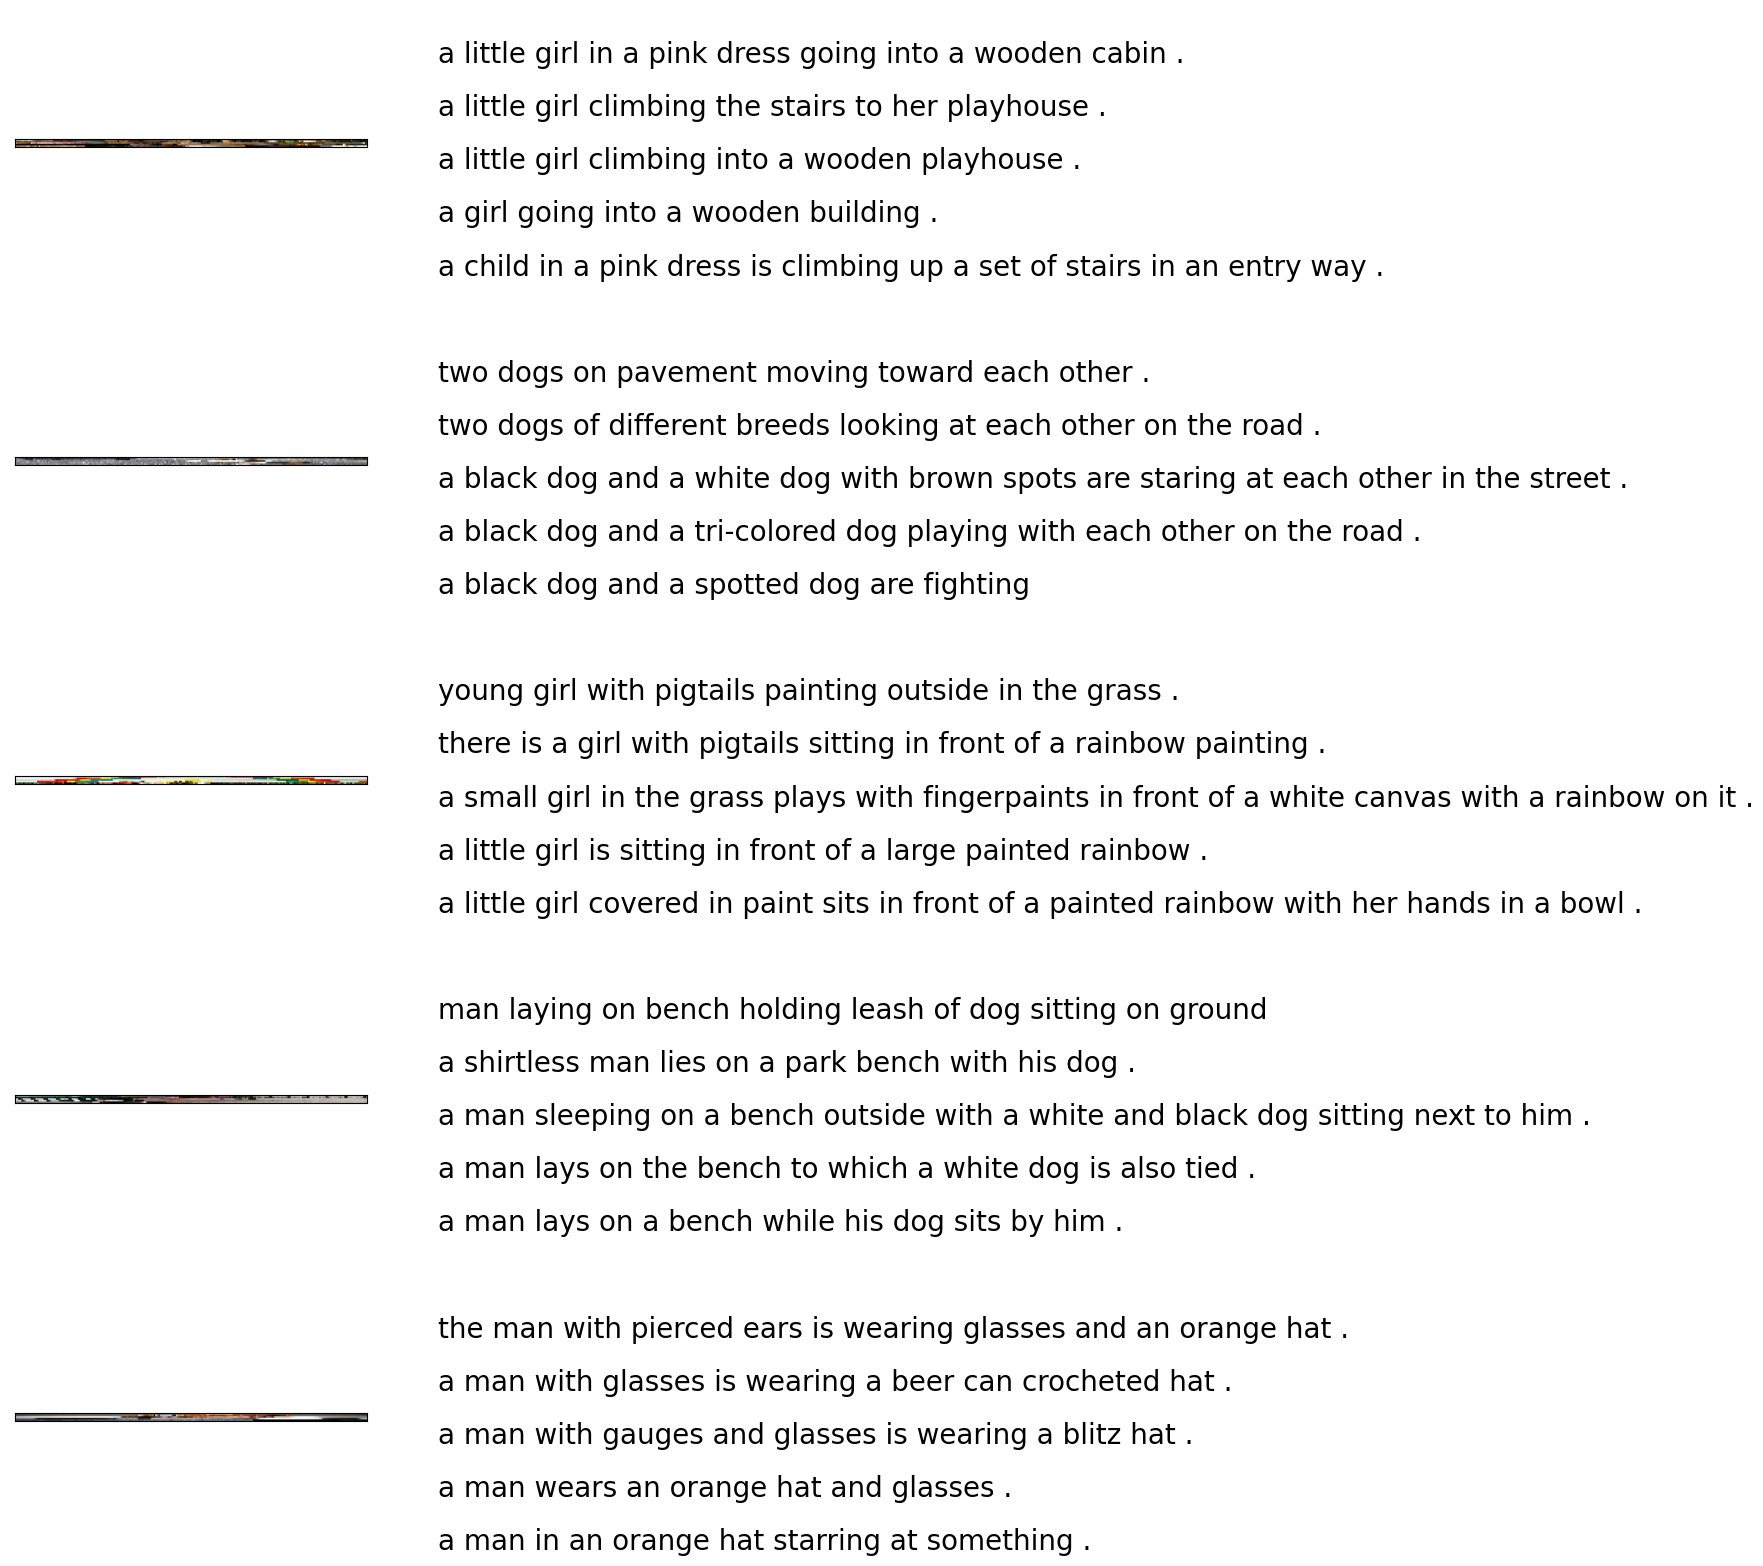

In [21]:
from keras.preprocessing.image import load_img, img_to_array

npic = 5
npix = 224
target_size = (npic , npix , 3)

count = 1
fig = plt.figure(figsize = (10,20))
for jpgfnm in uni_filenames[:npic]:
    filename = dir_Flickr_jpg +'/' + jpgfnm
    captions = list(df_txt["caption"].loc[df_txt["filename"]==jpgfnm].values)
    image_load =load_img(filename , target_size = target_size)
    ax = fig.add_subplot(npic, 2 , count, xticks= [], yticks=[])
    ax.imshow(image_load)
    count +=1

    ax = fig.add_subplot(npic , 2 , count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0, len(captions))
    for i, caption in enumerate(captions):
        ax.text(0, i , caption , fontsize = 20)
    count +=1

plt.show()

In [22]:
def df_word(df_txt):
    vocabulary= []
    for i in range(len(df_txt)):
        temp = df_txt.iloc[i,2]
        vocabulary.extend(temp.split())
    print('Vocabulary size: %d ' % len(set(vocabulary)))
    ct = Counter(vocabulary)
    dfword = pd.DataFrame({"word":list(ct.keys()),"count":list(ct.values())})
    dfword = dfword.sort_values("count",ascending=False)
    dfword = dfword.reset_index()[["word","count"]]
    return(dfword)
dfword = df_word(df_txt)
dfword.head(3)
    

Vocabulary size: 8918 


,word,count
0,a,62989
1,.,36581
2,in,18975


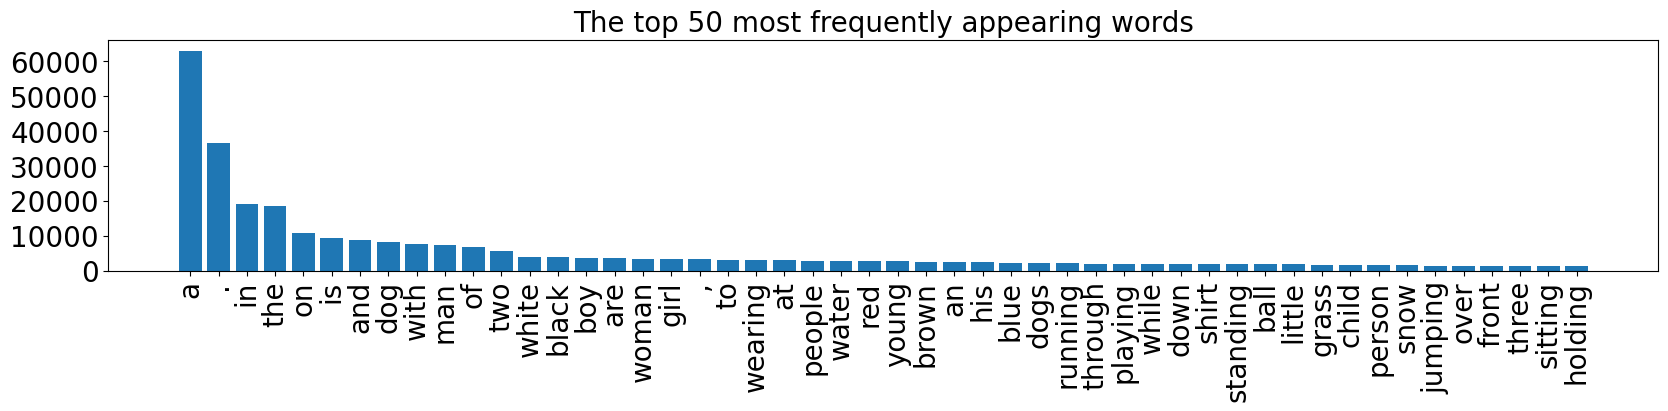

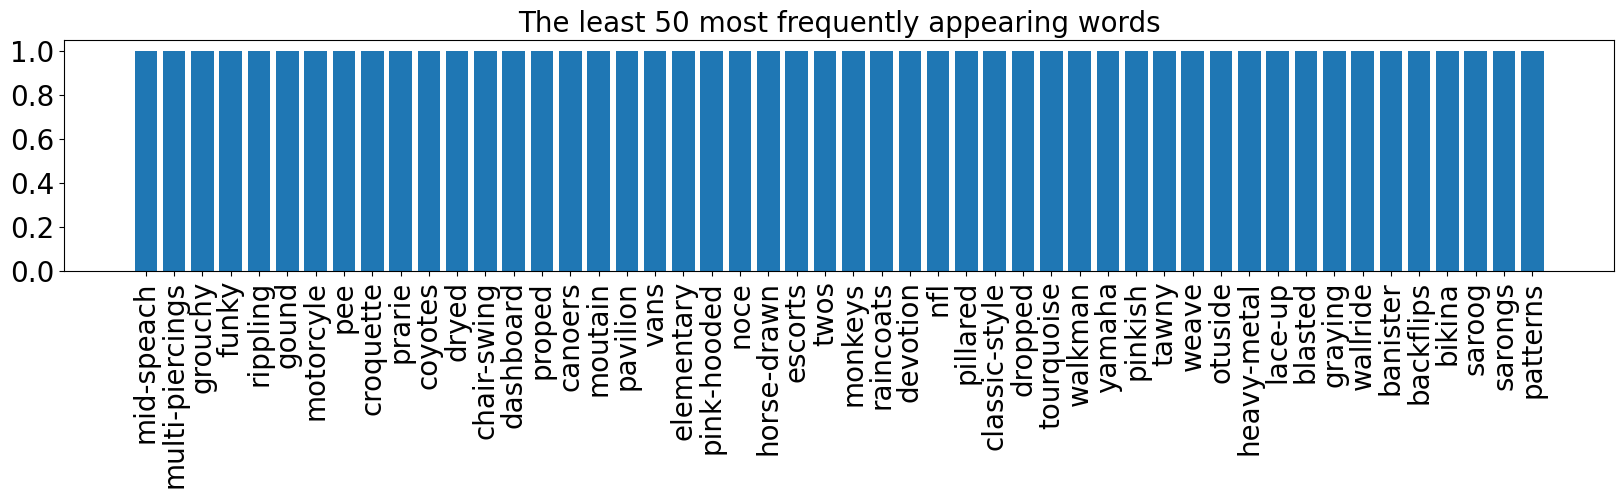

In [23]:
topn = 50

def plthist(dfsub, title="The top 50 most frequently appearing words"):
    plt.figure(figsize = (20,3))
    plt.bar(dfsub.index, dfsub["count"])
    plt.yticks(fontsize=20)
    plt.xticks(dfsub.index, dfsub["word"],rotation= 90, fontsize = 20)
    plt.title(title,fontsize=20)
    plt.show()

plthist(dfword.iloc[:topn,:],
        title="The top 50 most frequently appearing words")
plthist(dfword.iloc[-topn:,:],
        title="The least 50 most frequently appearing words")

    